# Lab | Web Scraping

Welcome to the "Books to Scrape" Web Scraping Adventure Lab!

**Objective**

In this lab, we will embark on a mission to unearth valuable insights from the data available on Books to Scrape, an online platform showcasing a wide variety of books. As data analyst, you have been tasked with scraping a specific subset of book data from Books to Scrape to assist publishing companies in understanding the landscape of highly-rated books across different genres. Your insights will help shape future book marketing strategies and publishing decisions.

**Background**

In a world where data has become the new currency, businesses are leveraging big data to make informed decisions that drive success and profitability. The publishing industry, much like others, utilizes data analytics to understand market trends, reader preferences, and the performance of books based on factors such as genre, author, and ratings. Books to Scrape serves as a rich source of such data, offering detailed information about a diverse range of books, making it an ideal platform for extracting insights to aid in informed decision-making within the literary world.

**Task**

Your task is to create a Python script using BeautifulSoup and pandas to scrape Books to Scrape book data, focusing on book ratings and genres. The script should be able to filter books with ratings above a certain threshold and in specific genres. Additionally, the script should structure the scraped data in a tabular format using pandas for further analysis.

**Expected Outcome**

A function named `scrape_books` that takes two parameters: `min_rating` and `max_price`. The function should scrape book data from the "Books to Scrape" website and return a `pandas` DataFrame with the following columns:

**Expected Outcome**

- A function named `scrape_books` that takes two parameters: `min_rating` and `max_price`.
- The function should return a DataFrame with the following columns:
  - **UPC**: The Universal Product Code (UPC) of the book.
  - **Title**: The title of the book.
  - **Price (£)**: The price of the book in pounds.
  - **Rating**: The rating of the book (1-5 stars).
  - **Genre**: The genre of the book.
  - **Availability**: Whether the book is in stock or not.
  - **Description**: A brief description or product description of the book (if available).
  
You will execute this script to scrape data for books with a minimum rating of `4.0 and above` and a maximum price of `£20`. 

Remember to experiment with different ratings and prices to ensure your code is versatile and can handle various searches effectively!

**Resources**

- [Beautiful Soup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/index.html)
- [Books to Scrape](https://books.toscrape.com/)


**Hint**

Your first mission is to familiarize yourself with the **Books to Scrape** website. Navigate to [Books to Scrape](http://books.toscrape.com/) and explore the available books to understand their layout and structure. 

Next, think about how you can set parameters for your data extraction:

- **Minimum Rating**: Focus on books with a rating of 4.0 and above.
- **Maximum Price**: Filter for books priced up to £20.

After reviewing the site, you can construct a plan for scraping relevant data. Pay attention to the details displayed for each book, including the title, price, rating, and availability. This will help you identify the correct HTML elements to target with your scraping script.

Make sure to build your scraping URL and logic based on the patterns you observe in the HTML structure of the book listings!


---

**Best of luck! Immerse yourself in the world of books, and may the data be with you!**

**Important Note**:

In the fast-changing online world, websites often update and change their structures. When you try this lab, the **Books to Scrape** website might differ from what you expect.

If you encounter issues due to these changes, like new rules or obstacles preventing data extraction, don’t worry! Get creative.

You can choose another website that interests you and is suitable for scraping data. Options like Wikipedia, The New York Times, or even library databases are great alternatives. The main goal remains the same: extract useful data and enhance your web scraping skills while exploring a source of information you enjoy. This is your opportunity to practice and adapt to different web environments!

In [1]:
"""import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

def scrape_books(min_rating, max_price):
    # Base URL for book catalog:
    base_url = 'http://books.toscrape.com/catalogue/page-{}.html'
    
    # Initialize an empty list for books:
    book_data = []

    # Start with first page of catalog:
    page = 1

    while True:
        print(f"Scraping page {page}...")
        
        # Make HTTP request to fetch content of current page:
        response = requests.get(base_url.format(page))
        
        # Break loop if page request is unsuccessful:
        if response.status_code != 200:
            print(f"Failed to retrieve page {page}. Status code: {response.status_code}")
            break
        
        # Parse HTML content of page:
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find all articles on page:
        books = soup.find_all('article', class_='product_pod')
        
        # If no books found, break loop:
        if not books:
            break
            
        for book in books:
            # Extract title:
            title = book.h3.a['title']
            
            # Extract price and convert it to float:
            price = float(book.find('p', class_='price_color').text.strip('£'))
            
            # Extract and map rating class to corresponding integer value:
            rating = {
                'One': 1, 'Two': 2, 'Three': 3, 
                'Four': 4, 'Five': 5
            }[book.p['class'][1]]
            
            # Extract availability info:
            availability = book.find('p', class_='instock availability').text.strip()
            
            # Get URL of detail page to fetch additional information:
            book_url = "http://books.toscrape.com/catalogue/" + book.h3.a['href']
            
            # Make HTTP request to detail page:
            book_response = requests.get(book_url)
            book_soup = BeautifulSoup(book_response.content, 'html.parser')
            
            # Extract genre from breadcrumb navigation:
            genre = book_soup.find('ul', class_='breadcrumb').find_all('li')[2].text.strip()
            
            # Extract UPC from details table:
            upc = book_soup.find('th', string='UPC').find_next_sibling('td').string.strip()
            
            # Extract description or set a default message:
            description_tag = book_soup.select_one('#product_page > p')
            description = description_tag.text.strip() if description_tag else 'No description available'
            
            # Append book to list if it meets needed criteria:
            if rating >= min_rating and price <= max_price:
                book_data.append([upc, title, price, rating, genre, availability, description])
        
        # Move to next page:
        page += 1
        
        # Introduce a short delay to avoid overwhelming the server with requests:
        time.sleep(1)
            
    # Convert list into DataFrame:
    df = pd.DataFrame(book_data, columns=['UPC', 'Title', 'Price (£)', 'Rating', 'Genre', 'Availability', 'Description'])
    
    return df

# Fetch books with a minimum rating of 4 and a maximum price of £20:
df = scrape_books(min_rating=4, max_price=20)
print(df.head())"""

'import requests\nfrom bs4 import BeautifulSoup\nimport pandas as pd\nimport time\n\ndef scrape_books(min_rating, max_price):\n    # Base URL for book catalog:\n    base_url = \'http://books.toscrape.com/catalogue/page-{}.html\'\n    \n    # Initialize an empty list for books:\n    book_data = []\n\n    # Start with first page of catalog:\n    page = 1\n\n    while True:\n        print(f"Scraping page {page}...")\n        \n        # Make HTTP request to fetch content of current page:\n        response = requests.get(base_url.format(page))\n        \n        # Break loop if page request is unsuccessful:\n        if response.status_code != 200:\n            print(f"Failed to retrieve page {page}. Status code: {response.status_code}")\n            break\n        \n        # Parse HTML content of page:\n        soup = BeautifulSoup(response.content, \'html.parser\')\n        \n        # Find all articles on page:\n        books = soup.find_all(\'article\', class_=\'product_pod\')\n       

In [2]:
"""print(df.isnull().sum())
print(df.sample(10))"""

'print(df.isnull().sum())\nprint(df.sample(10))'

In [3]:
"""df.to_csv('scraped_books.csv', index=False)"""

"df.to_csv('scraped_books.csv', index=False)"

Summary statistics:
        Price (£)    Rating
count  75.000000  75.00000
mean   14.570933   4.56000
std     2.728553   0.49973
min    10.000000   4.00000
25%    12.340000   4.00000
50%    14.440000   5.00000
75%    16.850000   5.00000
max    19.690000   5.00000

Missing values:
 UPC             0
Title           0
Price (£)       0
Rating          0
Genre           0
Availability    0
Description     0
dtype: int64

Sample data:
                 UPC                                              Title  \
0  ce6396b0f23f6ecc                                        Set Me Free   
1  6258a1f6a6dcfe50  The Four Agreements: A Practical Guide to Pers...   
2  6be3beb0793a53e7                                     Sophie's World   
3  657fe5ead67a7767            Untitled Collection: Sabbath Poems 2014   
4  51653ef291ab7ddc                                    This One Summer   

   Price (£)  Rating           Genre Availability               Description  
0      17.46       5     Young Adult     

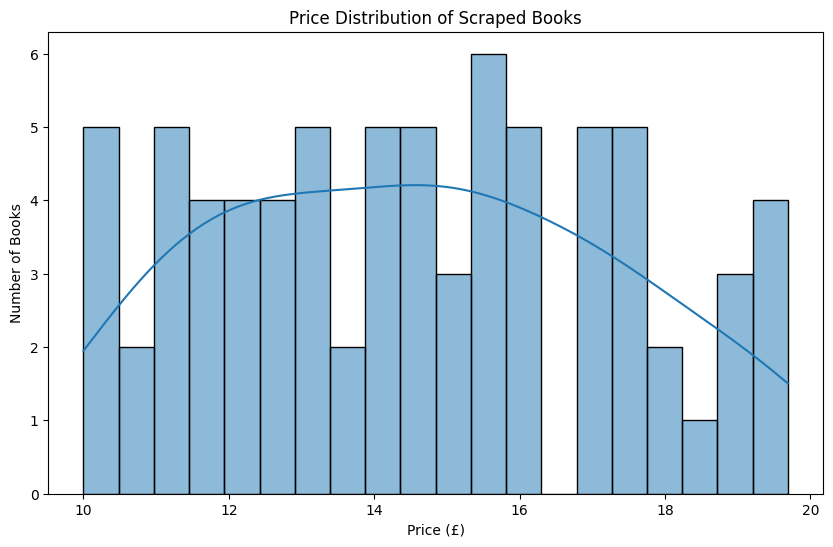

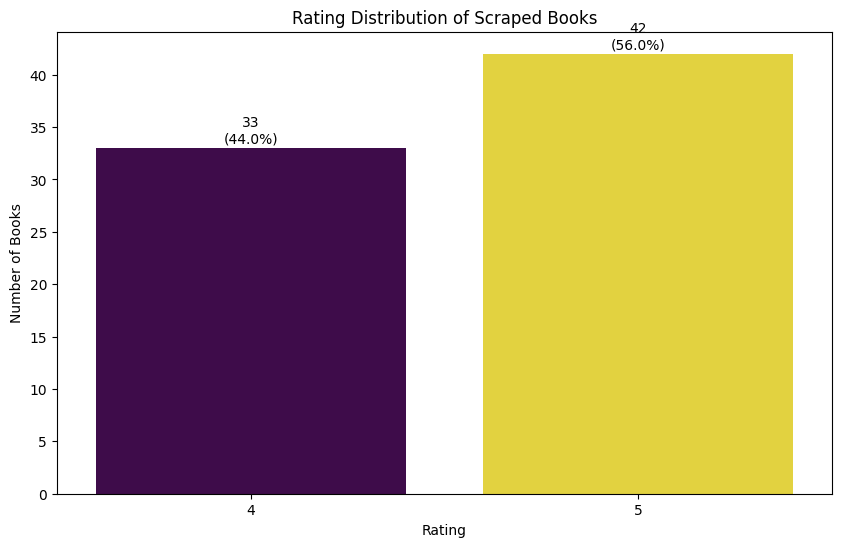

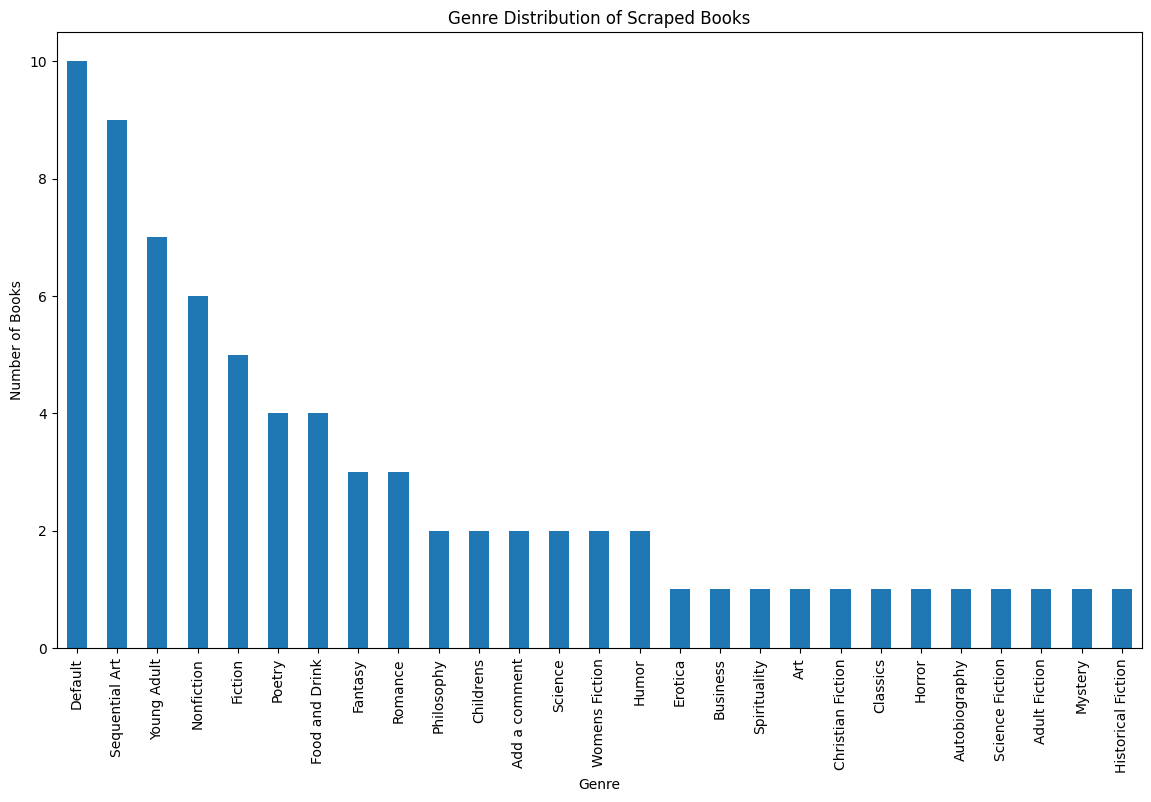

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load scraped data from CSV:
df = pd.read_csv('scraped_books.csv')

# Summary statistics:
summary = df.describe()
print("Summary statistics:\n", summary)

# Check for missing values:
print("\nMissing values:\n", df.isnull().sum())

# Preview data:
print("\nSample data:\n", df.head())

# Visualization - Price Distribution:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price (£)'], bins=20, kde=True)
plt.title('Price Distribution of Scraped Books')
plt.xlabel('Price (£)')
plt.ylabel('Number of Books')
plt.show()

# Visualization - Rating Distribution:
plt.figure(figsize=(10, 6))
ratings = df['Rating'].value_counts().sort_index()
ratings_df = pd.DataFrame({'Rating': ratings.index, 'Count': ratings.values})
ax = sns.barplot(x='Rating', y='Count', data=ratings_df, palette='viridis', hue='Rating', dodge=False, legend=False)
plt.title('Rating Distribution of Scraped Books')
plt.xlabel('Rating')
plt.ylabel('Number of Books')

# Annotating bar plot with counts and percentages:
for i in range(len(ratings)):
    count = ratings.values[i]
    percentage = (count / ratings.sum()) * 100
    ax.text(i, count + 0.5, f'{count}\n({percentage:.1f}%)', ha='center')

plt.show()

# Visualization - Genre Distribution:
plt.figure(figsize=(14, 8))
df['Genre'].value_counts().plot(kind='bar')
plt.title('Genre Distribution of Scraped Books')
plt.xlabel('Genre')
plt.ylabel('Number of Books')
plt.show()